In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [3]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# CONTEOS

## CONTEO DE TODAS LAS VARIABLES

In [4]:
penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## CONTEO DE VARIABLES NUMERICAS

In [5]:
penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## CONTEO DE VARIABLES CATEGORICAS

In [6]:
penguins_df.describe(include=object)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [7]:
(
  penguins_df
    .astype(
        {
        'species': 'category',
        'island' : 'category',
        'sex' : 'category'
        }
    )
).describe(include=['category',object])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


## GRAFICOS DE CONTEOS

<Axes: xlabel='species'>

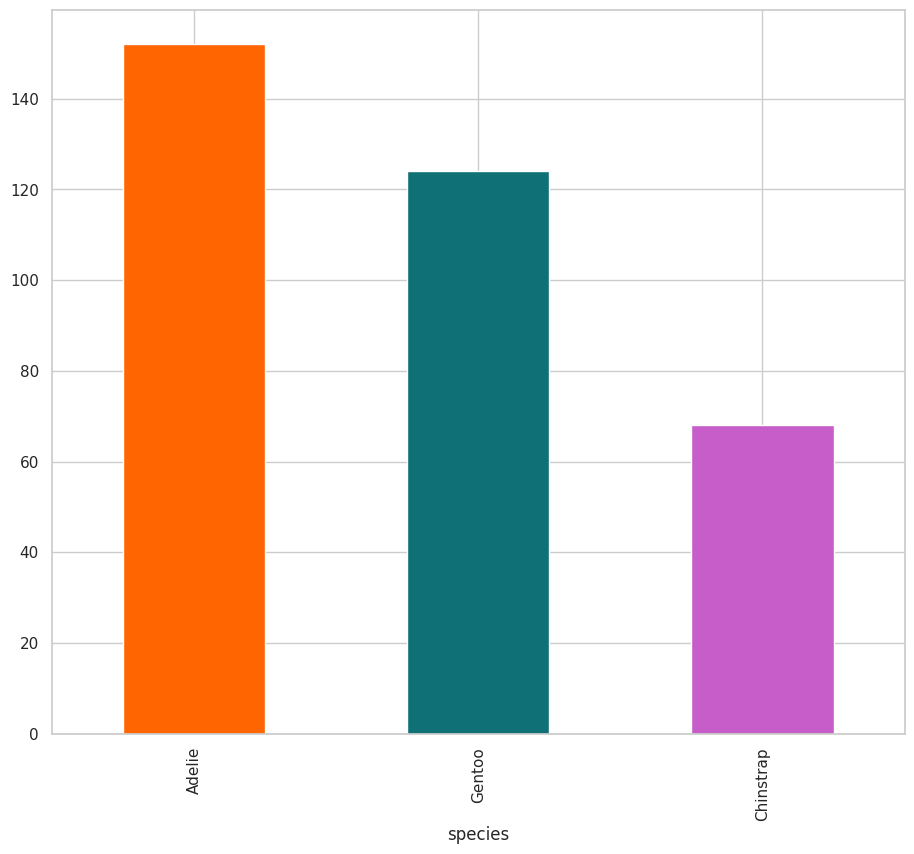

In [16]:
(
    penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar',
        color=penguin_color.values()
    )
)

<ipython-input-14-a3a7c05f1833>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='species', ylabel='count'>

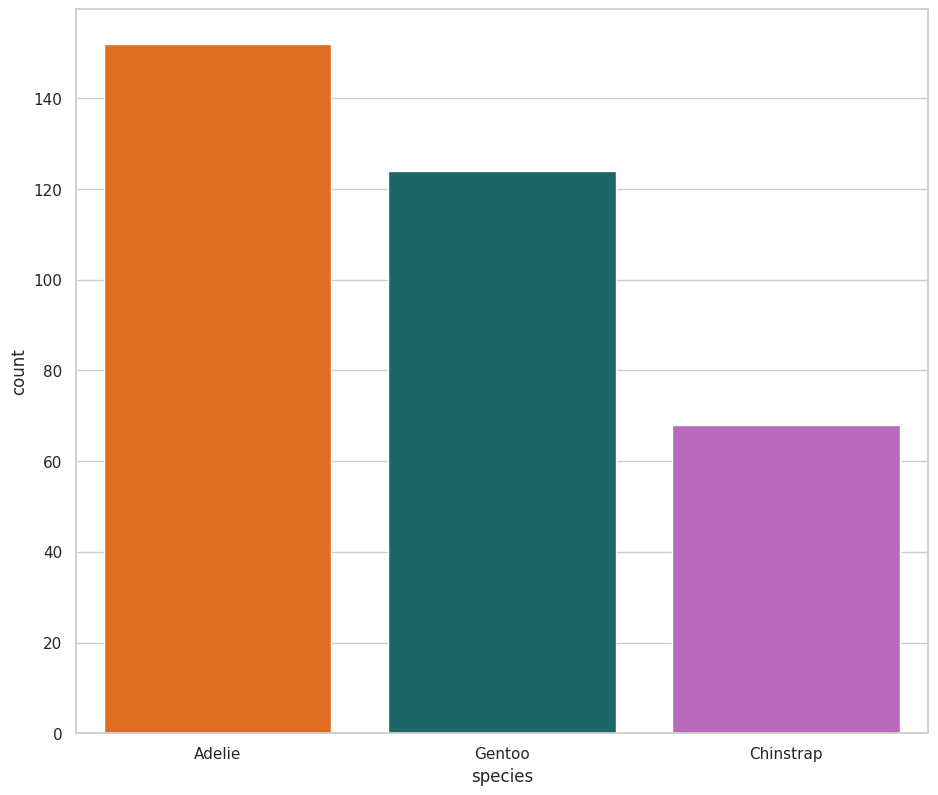

In [14]:
(
    penguins_df
    .value_counts('species',sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df :(
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
)

## EJERCICIO: GRAFICAR CONTEO DE ISLAS

In [19]:
island_color = {
    'Torgersen': '#ff6602ff',
    'Biscoe': '#0f7175ff',
    'Dream': '#c65dc9ff'
}

<ipython-input-20-74fc39adb536>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='island', ylabel='count'>

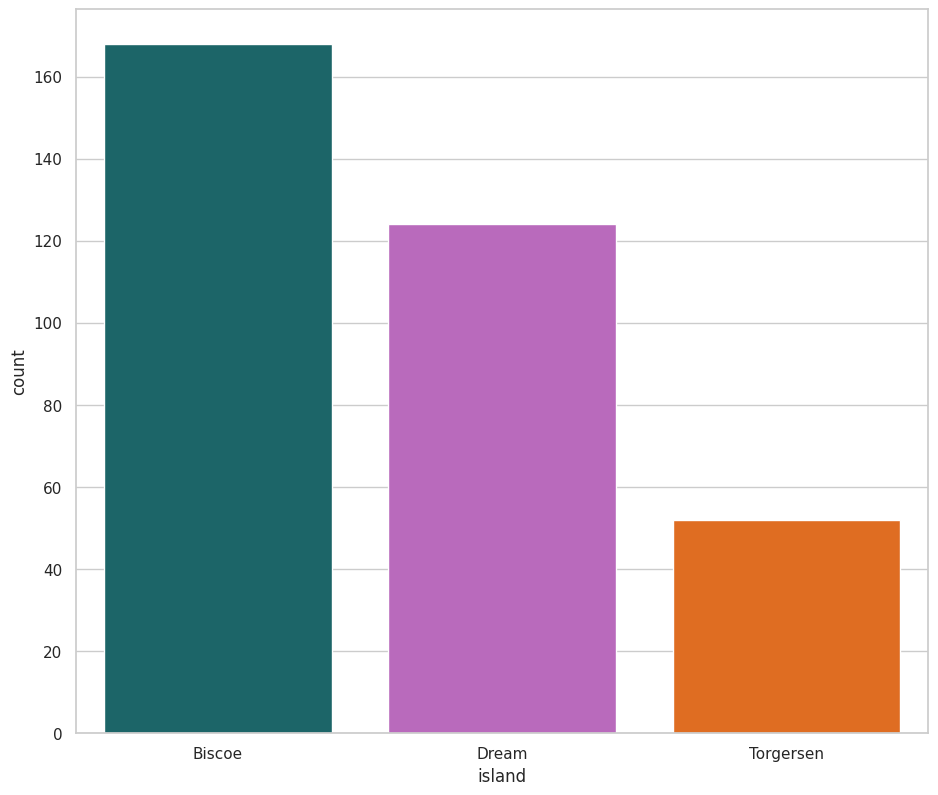

In [20]:
(
    penguins_df
    .value_counts('island',sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df :(
            sns.barplot(
                data=df,
                x='island',
                y='count',
                palette=island_color
            )
        )
    )
)

## PROPORCIONES

In [21]:
penguins_df['variable'] = ''

In [22]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,variable
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,


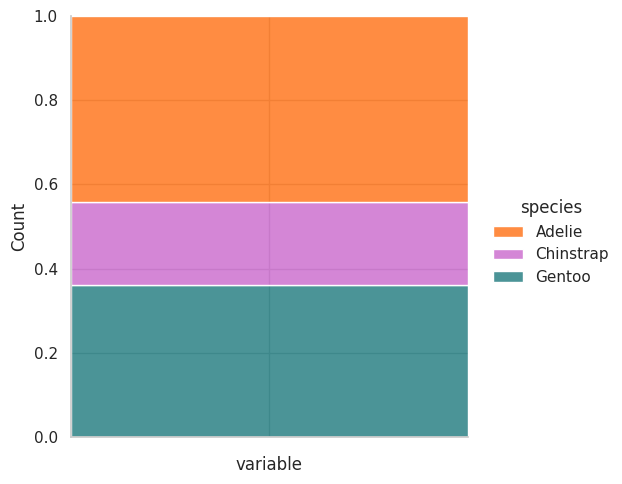

In [23]:
(
    penguins_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)